In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
churn_dataset = pd.read_csv("churn-bigml.csv")

In [3]:
churn_dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
churn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

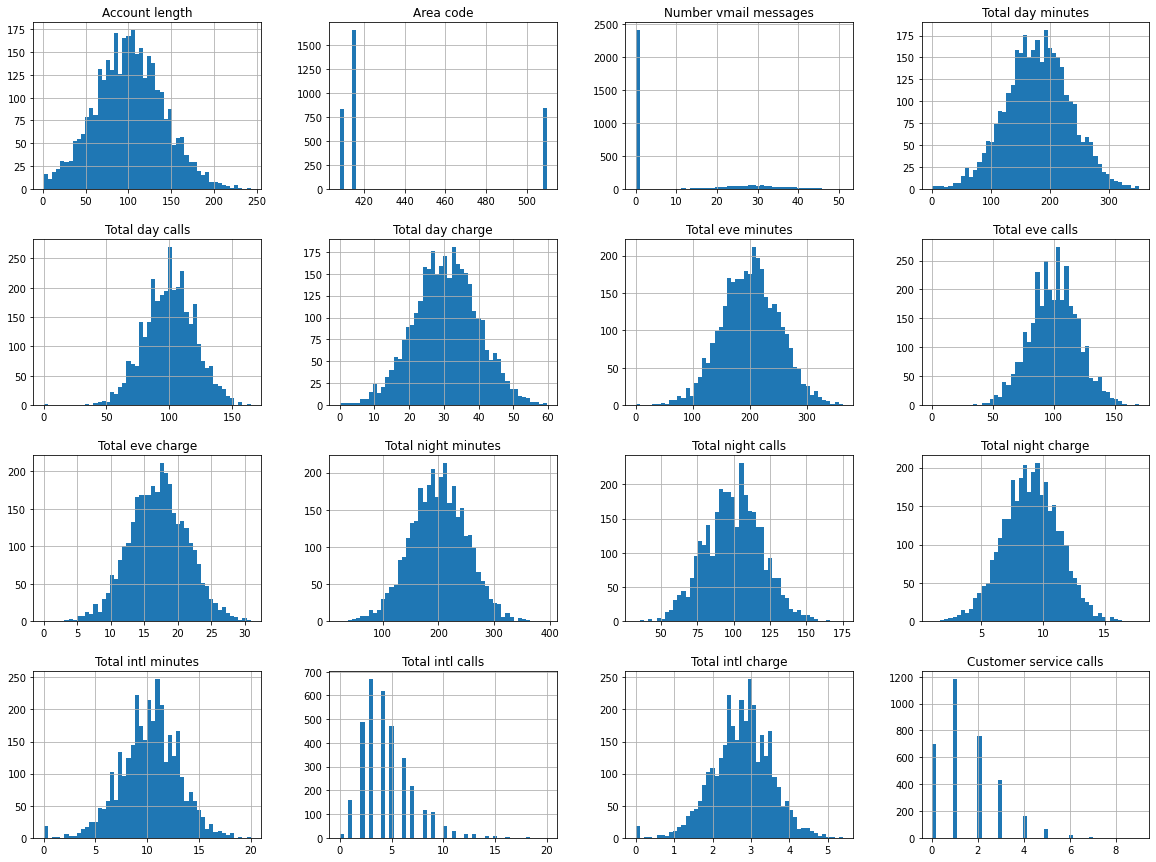

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
churn_dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
churn_dataset.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
churn_dataset['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'WV', 'RI', 'IA', 'MT',
       'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'NE', 'WY', 'IL', 'NH',
       'LA', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR', 'DE', 'IN', 'UT', 'CA',
       'SD', 'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'NY', 'KY', 'ME', 'MS',
       'MI', 'SC', 'TN', 'PA', 'HI', 'ND', 'CT'], dtype=object)

In [8]:
churn_dataset['Area code'].unique()

array([415, 408, 510], dtype=int64)

In [9]:
churn_dataset['International plan'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
churn_dataset['Voice mail plan'].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
churn_dataset['Area code'] = churn_dataset['Area code'].astype(str)

In [12]:
churn_dataset['Area code'].unique()

array(['415', '408', '510'], dtype=object)

In [13]:
X = churn_dataset.iloc[:, 2:19]
y = churn_dataset.iloc[:, 19]

In [14]:
X = pd.get_dummies(X, columns=['Area code', 'International plan','Voice mail plan'], drop_first=True)

In [15]:
X.head()

,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,0,0,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1,0,0,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1,0,0,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,1,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0,1,0


In [16]:
X.shape

(3333, 18)

In [17]:
y = pd.get_dummies(y, columns=['Churn'], drop_first=True)

In [18]:
y.head()

,True
0,0
1,0
2,0
3,0
4,0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#scaling after train test split

In [20]:
sc = StandardScaler()

In [21]:
X_train = sc.fit_transform(X_train)

In [22]:
X_train

array([[-0.60251811, -0.88445838, -0.3648073 , ...,  1.68814543,
        -0.33941238, -0.62942033],
       [-0.60251811,  1.72051831,  0.18544836, ...,  1.68814543,
         2.94626847, -0.62942033],
       [-0.60251811,  0.43642669, -0.41483054, ...,  1.68814543,
        -0.33941238, -0.62942033],
       ...,
       [ 0.48529705, -1.14753159, -0.16471433, ..., -0.59236603,
        -0.33941238,  1.58876341],
       [-0.60251811,  0.58360052,  0.33551808, ..., -0.59236603,
        -0.33941238, -0.62942033],
       [-0.60251811,  1.86401279,  1.18591319, ..., -0.59236603,
        -0.33941238, -0.62942033]])

In [23]:
clf = Sequential()

In [24]:
clf.add(Dense(units=10, kernel_initializer='uniform', activation='relu', input_dim=18))
clf.add(Dense(units=10, kernel_initializer='uniform', activation='relu'))
clf.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [25]:
clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                190       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________


In [27]:
clf.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
234/234 [==============================] - 1s 935us/step - loss: 0.6228 - accuracy: 0.8434
Epoch 2/100
234/234 [==============================] - 0s 912us/step - loss: 0.3419 - accuracy: 0.8534
Epoch 3/100
234/234 [==============================] - 0s 905us/step - loss: 0.3337 - accuracy: 0.8527
Epoch 4/100
234/234 [==============================] - 0s 957us/step - loss: 0.3346 - accuracy: 0.8422
Epoch 5/100
234/234 [==============================] - 0s 901us/step - loss: 0.3055 - accuracy: 0.8608
Epoch 6/100
234/234 [==============================] - 0s 862us/step - loss: 0.3347 - accuracy: 0.8489
Epoch 7/100
234/234 [==============================] - 0s 1ms/step - loss: 0.2999 - accuracy: 0.8615
Epoch 8/100
234/234 [==============================] - 0s 884us/step - loss: 0.2926 - accuracy: 0.8770
Epoch 9/100
234/234 [==============================] - 0s 845us/step - loss: 0.3260 - accuracy: 0.8609
Epoch 10/100
234/234 [==============================] - 0s 841us/step - los

In [28]:
X_test = sc.transform(X_test)

In [29]:
X_test

array([[-0.60251811,  0.92577966,  0.48558781, ..., -0.59236603,
        -0.33941238, -0.62942033],
       [-0.60251811, -0.62690419, -1.56536509, ..., -0.59236603,
         2.94626847, -0.62942033],
       [-0.60251811,  0.32604632, -1.8154813 , ..., -0.59236603,
        -0.33941238, -0.62942033],
       ...,
       [-0.60251811, -0.73728456,  0.8357505 , ..., -0.59236603,
        -0.33941238, -0.62942033],
       [ 0.55781806,  0.76572812,  0.48558781, ..., -0.59236603,
        -0.33941238,  1.58876341],
       [ 1.79067523,  0.71237761,  0.18544836, ..., -0.59236603,
        -0.33941238,  1.58876341]])

In [30]:
y_pred = clf.predict(X_test)

In [31]:
y_pred

array([[1.02284849e-02],
       [2.43469000e-01],
       [1.79229707e-01],
       [7.12430120e-01],
       [1.27453744e-01],
       [4.76756692e-03],
       [3.12265754e-03],
       [7.52520680e-01],
       [2.63381004e-02],
       [1.69771940e-01],
       [4.54700589e-02],
       [6.71159029e-02],
       [2.39208162e-01],
       [1.45766139e-03],
       [1.78488195e-02],
       [1.26947165e-02],
       [1.79690123e-03],
       [7.68592954e-03],
       [1.64092630e-01],
       [3.67113590e-01],
       [7.70360231e-01],
       [4.44784760e-03],
       [1.35436416e-01],
       [1.89462900e-02],
       [1.26881003e-02],
       [8.48666430e-02],
       [7.64608383e-04],
       [8.99377465e-03],
       [1.17630988e-01],
       [5.50122857e-02],
       [1.46492422e-02],
       [7.12430120e-01],
       [1.17380321e-02],
       [2.77417004e-02],
       [9.92065430e-01],
       [6.95126653e-01],
       [1.25586689e-01],
       [7.76591897e-03],
       [7.50239491e-02],
       [4.67172861e-02],


In [32]:
y_pred_exited = y_pred > 0.5

In [33]:
y_pred_exited

array([[False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [

In [34]:
cm = confusion_matrix(y_test, y_pred_exited)

In [35]:
print(cm)

[[833  27]
 [ 41  99]]


In [36]:
print(classification_report(y_test, y_pred_exited))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       860
           1       0.79      0.71      0.74       140

    accuracy                           0.93      1000
   macro avg       0.87      0.84      0.85      1000
weighted avg       0.93      0.93      0.93      1000

